Support Vector Machines

In [11]:
from sklearn import datasets

iris = datasets.load_iris()

In [ ]:
iris.keys()

In [15]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [24]:
# set up a linear svm classifier !
# using the iris dataset

import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

X_iris_len_width = iris["data"][:, (2, 3)]                     # petal length, petal width
y = iris["target"]
y_virginica = (y == 2).astype(np.int_)    # Iris virginica

# svm classifier
# set up a pipeline, first we apply standardization (to improve svm prediction)
# linear suppot vector classifcation
svm_clf = Pipeline( [("scaler", StandardScaler()), ("linear_svc", LinearSVC(C=1, loss="hinge")), ])
svm_clf.fit(X_iris_len_width, y_virginica)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [13]:
# test a prediction ! 
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [29]:
y_setosa = (y == 0)    # Iris setosa
y_versicolar = (y == 1).astype(np.int_)    # Iris versicolor


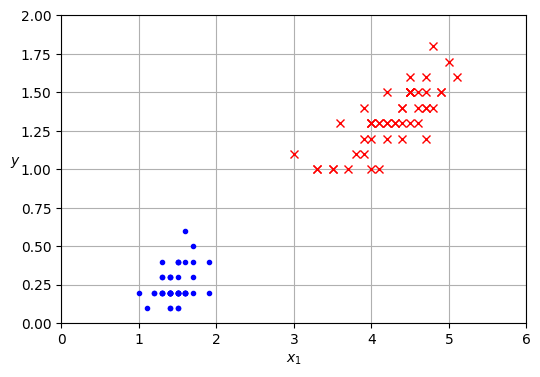

In [36]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(X_iris_len_width[:, 0][y==0], X_iris_len_width[:, 1][y==0], "b.")
plt.plot(X_iris_len_width[:, 0][y==1], X_iris_len_width[:, 1][y==1], "rx")

plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 6, 0, 2])
plt.grid()
plt.show()

Nonlinear SVM Classification

In [43]:
# test on a non linear dataset (the moons dataset)
# set up a pipeline with a polynomial transformer + standardscalar + linear SVC

from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X_moons, y_moons = make_moons(n_samples=100, noise=0.15)
polynomial_svm_clf = Pipeline([
("poly_features", PolynomialFeatures(degree=3)),    # 3 degree polynomial
("scaler", StandardScaler()),                       # the standard scalar
("svm_clf", LinearSVC(C=10, loss="hinge"))          # Linear Support Vector Classifier
])
polynomial_svm_clf.fit(X_moons, y_moons)

/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

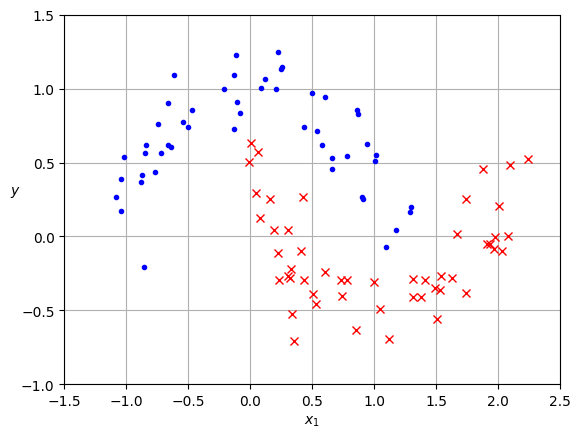

In [50]:
# plot of the dataset
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "b.")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "rx")

    plt.xlabel("$x_1$")
    plt.ylabel("$y$", rotation=0)
    plt.axis(axes)
    plt.grid()

plot_dataset(X_moons, y_moons, [-1.5, 2.5, -1, 1.5])
plt.show()

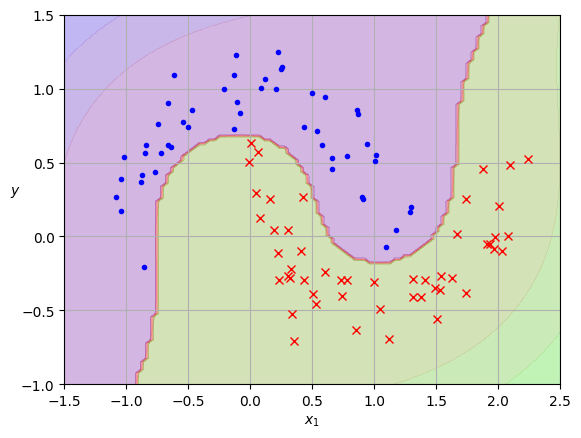

In [53]:
# and then plot predictions plus the non linear threshold 

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X_moons, y_moons, [-1.5, 2.5, -1, 1.5])

plt.show()



Polynomial Kernel

In [55]:
# let's see the Kernel Trick!

# in this case we use the SVC class and not the LinearSVC !
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([    # the usual pipeline ...
("scaler", StandardScaler()),       # standarization
("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5)) # ok using the SVC ! 3rd degree poly
])
poly_kernel_svm_clf.fit(X_moons, y_moons)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

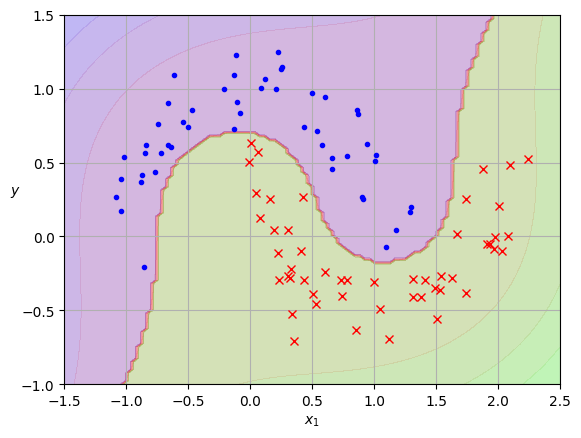

In [56]:
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X_moons, y_moons, [-1.5, 2.5, -1, 1.5])

plt.show()

In [57]:
poly_kernel_svm_clf_10deg = Pipeline([    # the usual pipeline ...
("scaler", StandardScaler()),       # standarization
("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5)) # ok using the SVC ! 3rd degree poly
])
poly_kernel_svm_clf_10deg.fit(X_moons, y_moons)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

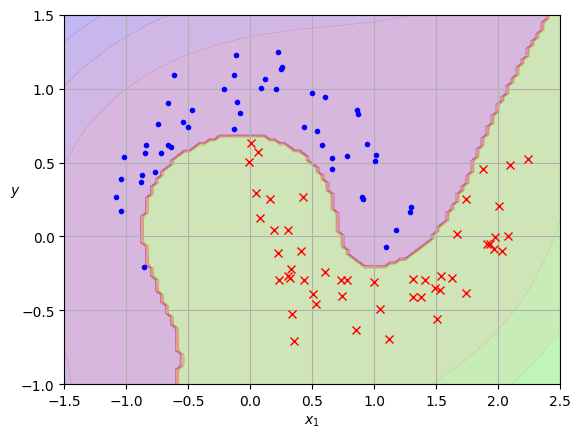

In [58]:
#and let's try with a 10 degree

plot_predictions(poly_kernel_svm_clf_10deg, [-1.5, 2.5, -1, 1.5])
plot_dataset(X_moons, y_moons, [-1.5, 2.5, -1, 1.5])

plt.show()